In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import os
from sklego.linear_model import LowessRegression
from statsmodels.nonparametric.api import KernelReg
from scipy.interpolate import UnivariateSpline

In [2]:
# Write a function for f(xi)
def mexican_hat(xi):
    return (1 - pow(xi, 2)) * math.exp(-0.5 * pow(xi, 2))

In [3]:
# Write a function to generate an error term based on N(0, 0.2^2) distribution
def error():
    return np.random.normal(0, 0.2)

In [4]:
# Create equi-distant x values
x_1 = [-2 * math.pi + (4 * math.pi * i) / 100 for i in range(101)]

In [5]:
# Load non-equidistant x values
s = os.path.sep
x_2 = pd.read_csv("D:" + s + "2022 Spring" + s + "ISYE7406" + s + "HW" + s + "HW4" + s + "HW04part2.x.csv")['x']

In [6]:
# Write a function to run Monte Carlo LOESS


# Equi-distant points

## LOWESS

In [7]:
Y = [mexican_hat(x) + error() for x in x_1]

In [8]:
loess = LowessRegression(span = 0.75)

In [9]:
loess.fit(np.array(x_1).reshape(-1,1), Y)

LowessRegression(span=0.75)

Text(0.5, 1.0, 'LOWESS')

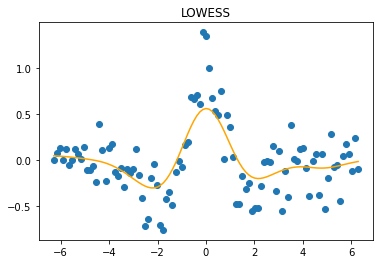

In [10]:
plt.scatter(x_1, Y)
plt.plot(x_1, loess.predict(np.array(x_1).reshape(-1,1)), color = 'orange')
plt.title('LOWESS')

## NW

In [11]:
# reg_type = 'lc' indicates NW kernel
NW = KernelReg(endog = Y, exog = x_1, var_type = 'c', reg_type = 'lc', bw = [0.2], ckertype = 'gaussian')

In [12]:
mean, fmx = NW.fit()

Text(0.5, 1.0, 'NW Kernel')

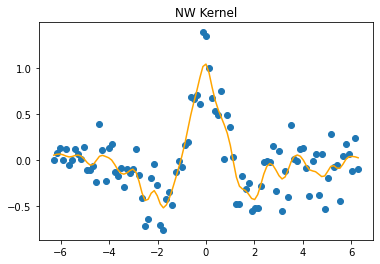

In [13]:
plt.scatter(x_1, Y)
plt.plot(x_1, mean, color = 'orange')
plt.title('NW Kernel')

## Spline

In [14]:
# Default is k = 3, cubic spline
spl = UnivariateSpline(x = x_1, y = Y)

Text(0.5, 1.0, 'Spline')

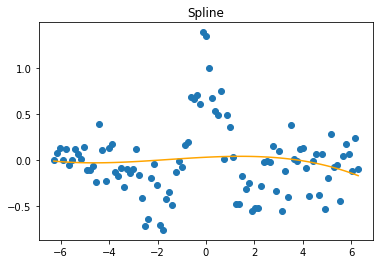

In [15]:
plt.scatter(x_1, Y)
plt.plot(x_1, spl(x_1), color = 'orange')
plt.title('Spline')